In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
rf = pd.read_csv("riskfactors.csv")
rf

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
0,2013,7,1,0,9,3,1,1,2,3,0,0,7
1,2013,7,1,0,9,3,1,1,2,3,1,0,3
2,2013,7,1,0,9,3,1,1,2,4,0,0,6
3,2013,7,1,0,9,3,1,1,2,4,1,0,1
4,2013,7,1,0,9,3,1,1,2,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509405,2017,13,9,9,9,9,1,9,2,9,1,0,1
509406,2017,13,9,9,9,9,2,0,2,9,0,0,1
509407,2017,13,9,9,9,9,2,9,2,9,9,9,1
509408,2017,13,9,9,9,9,3,0,2,9,0,0,1


In [179]:
rf.replace(9, np.nan, inplace=True)


In [180]:
rf.fillna(rf.mean(), inplace=True)


In [181]:
rf= rf.astype(int)

In [182]:
rf

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
0,2013,7,1,0,0,3,1,1,2,3,0,0,7
1,2013,7,1,0,0,3,1,1,2,3,1,0,3
2,2013,7,1,0,0,3,1,1,2,4,0,0,6
3,2013,7,1,0,0,3,1,1,2,4,1,0,1
4,2013,7,1,0,0,3,1,1,2,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509405,2017,13,2,0,0,1,1,0,2,2,1,0,1
509406,2017,13,2,0,0,1,2,0,2,2,0,0,1
509407,2017,13,2,0,0,1,2,0,2,2,0,0,1
509408,2017,13,2,0,0,1,3,0,2,2,0,0,1


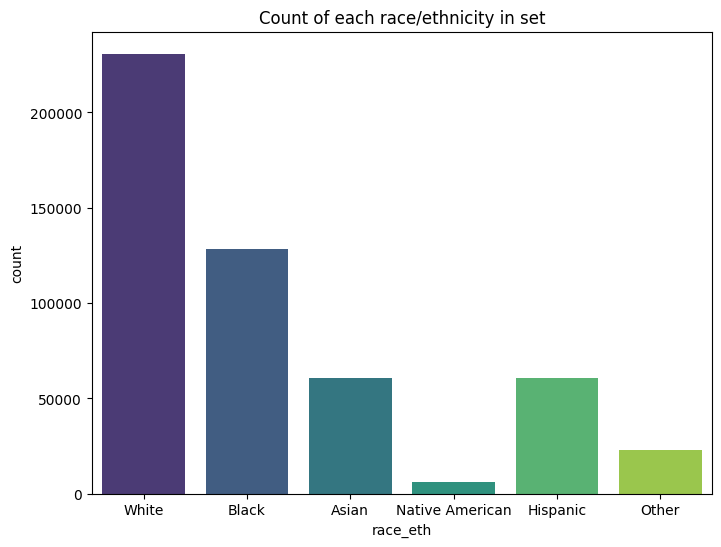

In [183]:
labels = ["White", "Black", "Asian", "Native American", "Hispanic", "Other"]

plt.figure(figsize=(8, 6))
sns.countplot(x='race_eth', data=rf, palette='viridis')
plt.title('Count of each race/ethnicity in set')
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.show()

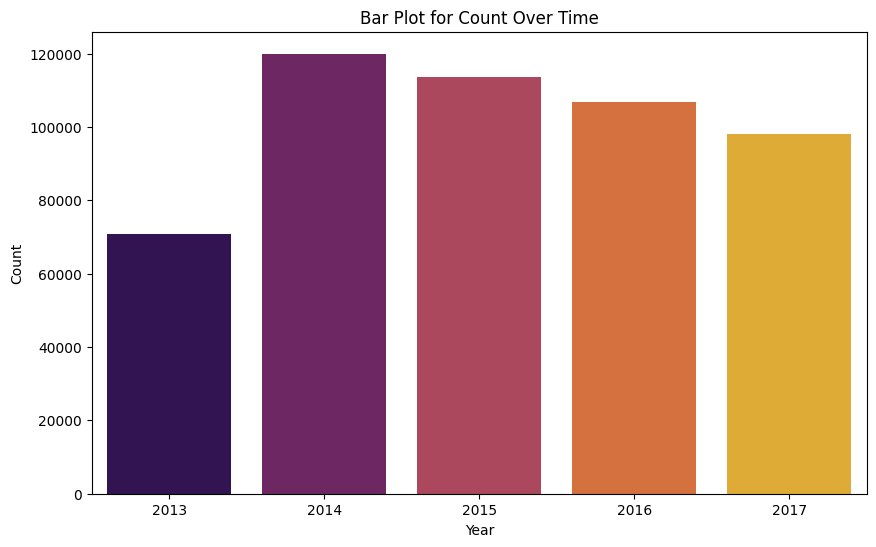

In [184]:
plt.figure(figsize=(10, 6))
sns.countplot(x="year", data=rf, palette="inferno")

# Adding labels and title
plt.title('Bar Plot for Count Over Time')
plt.xlabel('Year')
plt.ylabel('Count')

# Display the plot
plt.show()


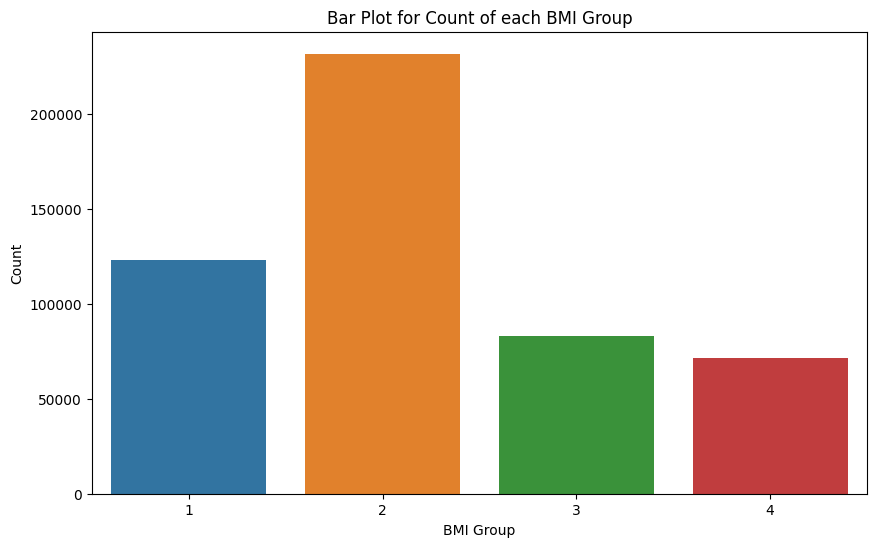

In [185]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bmi_group', data=rf)


# Adding labels and title
plt.title('Bar Plot for Count of each BMI Group')
plt.xlabel('BMI Group')
plt.ylabel('Count')

# Display the plot
plt.show()

c:\Users\mites\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


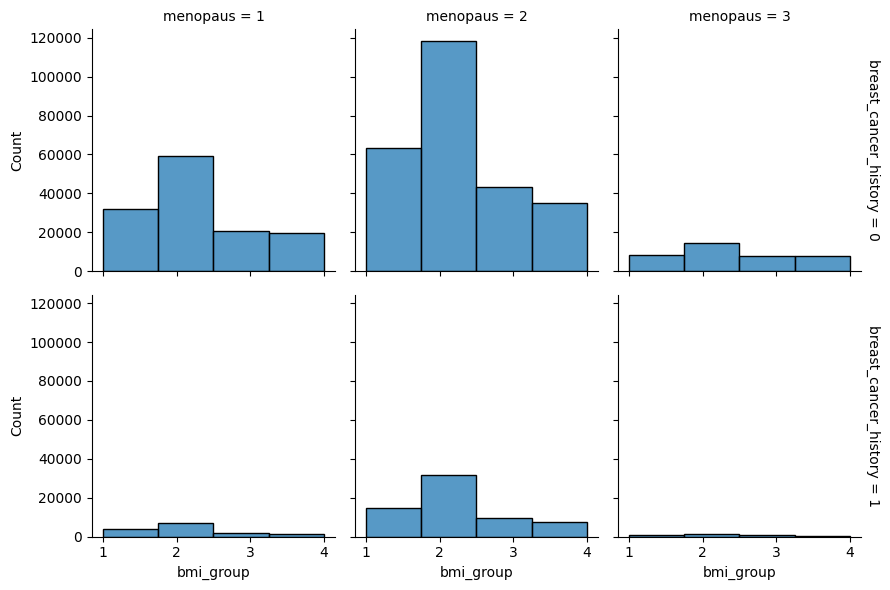

In [186]:
sns.displot(rf, x="bmi_group", col="menopaus", row="breast_cancer_history", binwidth=0.75, height=3, facet_kws=dict(margin_titles=True))

<Axes: xlabel='breast_cancer_history', ylabel='age_group_5_years'>

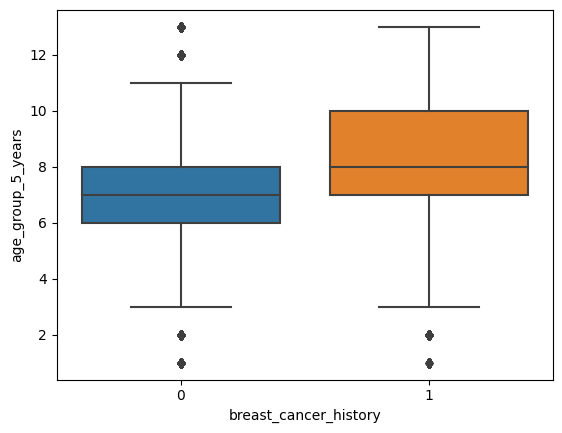

In [187]:
sns.boxplot(y='age_group_5_years', x='breast_cancer_history', data=rf)

<Axes: xlabel='breast_cancer_history', ylabel='current_hrt'>

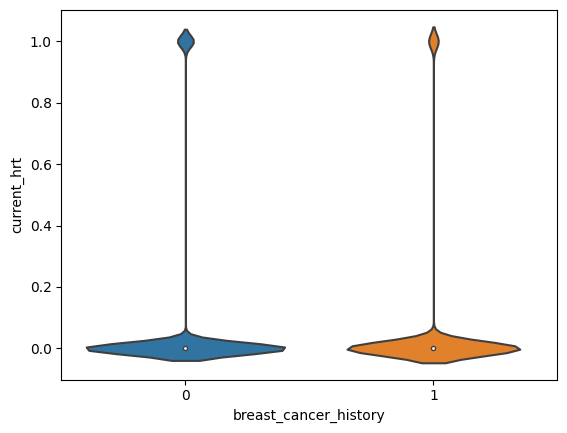

In [188]:
sns.violinplot(y='current_hrt', x='breast_cancer_history', data=rf)

c:\Users\mites\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


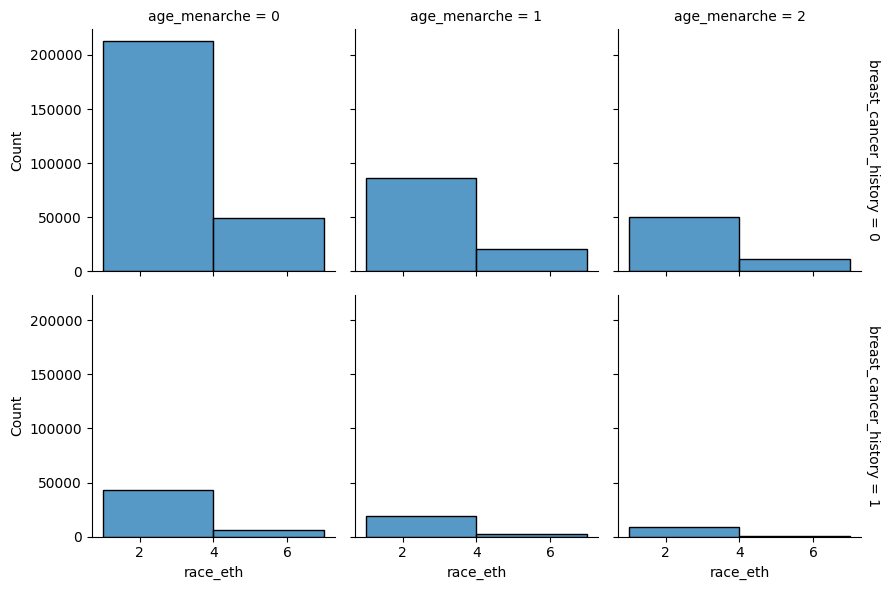

In [189]:
sns.displot(rf, x="race_eth", col="age_menarche", row="breast_cancer_history", binwidth=3, height=3, facet_kws=dict(margin_titles=True))

In [190]:
corr_matrix = rf.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
year,1.000000,0.137560,0.018572,0.016305,0.007352,0.011809,0.046192,0.020721,0.057767,0.026455,0.026948,0.021481,0.009604
age_group_5_years,0.137560,1.000000,0.098029,0.056632,0.009264,0.055238,0.158900,0.042231,0.348047,0.047178,0.114149,0.174454,0.012790
race_eth,0.018572,0.098029,1.000000,0.108716,0.020728,0.036679,0.011404,0.089404,0.064370,0.017609,0.078664,0.080859,0.103337
first_degree_hx,0.016305,0.056632,0.108716,1.000000,0.004235,0.004492,0.006135,0.006647,0.025172,0.004864,0.041945,0.022525,0.069697
age_menarche,0.007352,0.009264,0.020728,0.004235,1.000000,0.027900,0.005273,0.104012,0.009800,0.063411,0.014666,0.013372,0.049349
age_first_birth,0.011809,0.055238,0.036679,0.004492,0.027900,1.000000,0.078301,0.019624,0.037571,0.053177,0.016607,0.011013,0.006040
BIRADS_breast_density,0.046192,0.158900,0.011404,0.006135,0.005273,0.078301,1.000000,0.000085,0.097979,0.246197,0.043147,0.015946,0.001732
current_hrt,0.020721,0.042231,0.089404,0.006647,0.104012,0.019624,0.000085,1.000000,0.098400,0.056235,0.010984,0.029494,0.031015
menopaus,0.057767,0.348047,0.064370,0.025172,0.009800,0.037571,0.097979,0.098400,1.000000,0.029925,0.051298,0.055143,0.025374
bmi_group,0.026455,0.047178,0.017609,0.004864,0.063411,0.053177,0.246197,0.056235,0.029925,1.000000,0.033921,0.034032,0.049148


In [191]:
df = pd.read_csv("breastcancerdata.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [192]:
df.shape

(569, 33)

In [193]:
df2 = df.drop(columns=["Unnamed: 32", "id"])

In [194]:
df2['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [195]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df2['diagnosis'] = labelencoder.fit_transform(df2['diagnosis'].values)
df2['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [196]:
df2.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: >

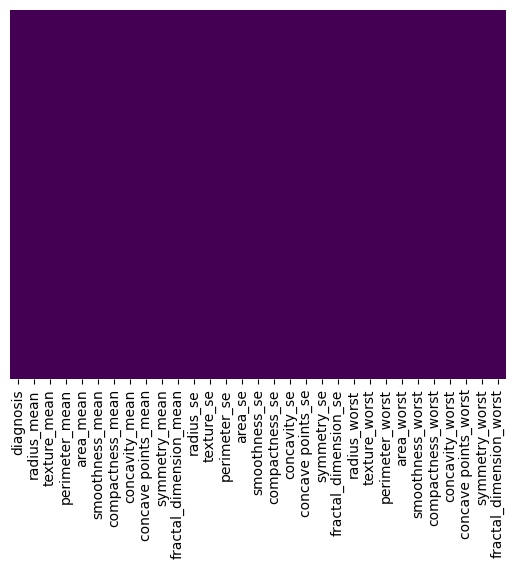

In [197]:
sns.heatmap(df2.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [198]:
df2.dtypes

diagnosis                    int32
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [199]:
dfmeans = df2.iloc[:,0:11]
dfmeans

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [200]:
corr_matrix = dfmeans.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


In [201]:
df2.corrwith(df2['diagnosis']).abs().sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

In [202]:
X = df2.drop('diagnosis', axis=1).values
y = df2['diagnosis']

In [203]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=12)

In [205]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [206]:
model = KNeighborsClassifier(n_neighbors = 1)  
model.fit(X_train, y_train)
predicted = model.predict(X_test)

print(confusion_matrix(y_test, predicted))
print("Accuracy (KNN[1]): ", accuracy_score(y_test, predicted.round())*100, "%")

  


[[104   3]
 [  6  58]]
Accuracy (KNN[1]):  94.73684210526315 %


Text(0.5, 1.0, 'Error Rate vs. K Value')

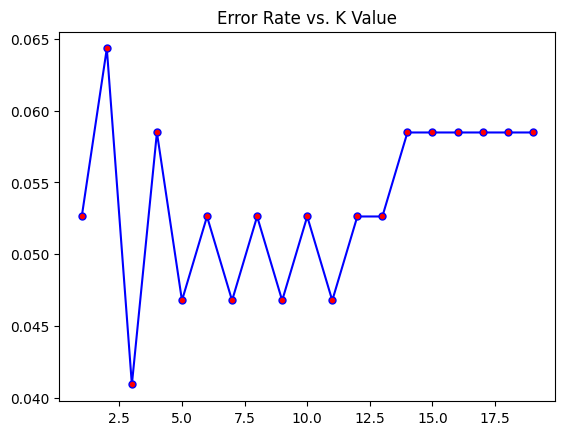

In [207]:
error_rate = []
  
for i in range(1, 20):
      
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.plot(range(1, 20), error_rate, color ='blue',marker ='o',markerfacecolor ='red', markersize =5)
plt.title('Error Rate vs. K Value')



In [209]:
model = KNeighborsClassifier(n_neighbors = 3)
  
model.fit(X_train, y_train)
predicted = model.predict(X_test)
  
print('Confusion Matrix :')
print(confusion_matrix(y_test, predicted))

print()
print("Accuracy (KNN[5]): ", accuracy_score(y_test, predicted.round())*100, "%")


Confusion Matrix :
[[106   1]
 [  6  58]]

Accuracy (KNN[5]):  95.90643274853801 %


<Axes: >

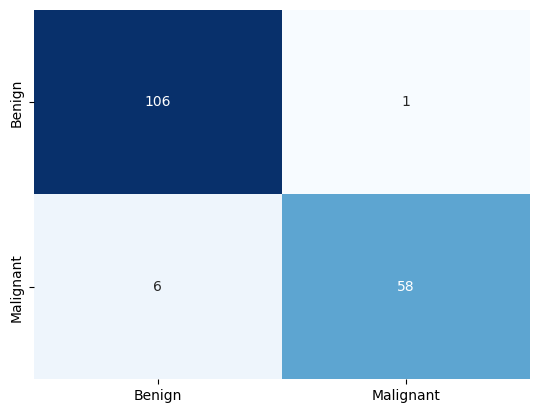

In [211]:
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
